In [1]:
# Multiple Linear Regression with Scikit-Learn

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [45]:
%pip install streamlit

   ---------------------------------------- 0.0/10.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/10.1 MB 7.8 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/10.1 MB 9.1 MB/s eta 0:00:01
   -------------------- ------------------- 5.2/10.1 MB 10.6 MB/s eta 0:00:01
   ------------------------- -------------- 6.3/10.1 MB 8.5 MB/s eta 0:00:01
   --------------------------- ------------ 6.8/10.1 MB 7.3 MB/s eta 0:00:01
   ------------------------------ --------- 7.6/10.1 MB 6.7 MB/s eta 0:00:01
   --------------------------------- ------ 8.4/10.1 MB 6.2 MB/s eta 0:00:01
   ----------------------------------- ---- 8.9/10.1 MB 5.8 MB/s eta 0:00:01
   -------------------------------------- - 9.7/10.1 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------- 10.1/10.1 MB 5.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/731.2 kB ? eta -:--:--
   ---------------------------- ----------- 524.3/731.2 kB 3.9 MB/s eta 0:00:01
   ----

In [3]:
# Load the dataset
# Assuming the dataset is in the same directory as this script
df = pd.read_csv("Advertising.csv")

# Lets look at the shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (200, 5)


In [4]:
# Lets look at the first few rows of the dataset
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
# Column "Unnamed: 0" is just an index column, we can drop it
# df.drop(columns=["Unnamed: 0"], inplace=True)
# or
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [6]:
# Lets look at the first few rows of the dataset
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
# Problem Statement:
# The dataset contains information about advertising budgets and sales.
# We want to predict the sales based on the advertising budgets for TV, Radio, and Newspaper.

# Column description:
# - TV: Advertising budget for TV in thousands of dollars
# - Radio: Advertising budget for Radio in thousands of dollars
# - Newspaper: Advertising budget for Newspaper in thousands of dollars
# - Sales: Sales in thousands of units

# Algorithm:
# We will use Multiple Linear Regression to predict the sales based on the advertising budgets for TV, Radio, and Newspaper.
# We will use Scikit-Learn's LinearRegression model for this purpose.
# Equation:
# Sales = c + m1*TV + m2*Radio + m3*Newspaper

# Broad Steps to Solve the Problem:
# 1. Import necessary libraries
# 2. Load the dataset
# 3. Explore the dataset ( to see if there are any missing values, outliers, etc., and also to check if there is linear relationship between the features and the target variable)
# 4. Encoding categorical variables (if any)
# 5. Separate the independent variables (features) to X and dependent variable (target) to y
# 6. Split the dataset into training and testing sets
# 7. Scale the independent variables (if necessary). You will not scale the dependent variable.
# 8. Modeling - apply the Multiple Linear Regression algorithm or any other algorithm of your choice
# 9. Make predictions on the test set
# 10. Evaluate the model performance using appropriate metrics (e.g., R-squared, Mean Absolute Error, etc.)
# 11. Visualize the results (if necessary)
# 12. Save the model (if necessary)
# 13. Document the findings and conclusions
# 14. Share the results with stakeholders (if necessary)
# 15. Deploy the model (if necessary)

In [8]:
# Step1 and Step2 are already done above.

# Step 3: Explore the dataset
# Check for missing values
print("Missing values in each column:")
df.isnull().sum().sort_values(ascending=False)
# Insight: There are no missing values in the dataset.

Missing values in each column:


TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [9]:
# Lets look at the data types of the columns
print("Data types of the columns:")
print(df.dtypes)

Data types of the columns:
TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object


In [10]:
# Lets look at the information about the dataset
print("Information about the dataset:")
df.info()

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
# Lets look at the summary statistics of the dataset
print("Summary statistics of the dataset:")
df.describe()

# Insight:
# 1. Most of the companies have a higher advertising budget for TV compared to Radio and Newspaper.
# 2. The lowest advertising budget is for radio.
# 2. The average sales is around 14.02 thousand units.

Summary statistics of the dataset:


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

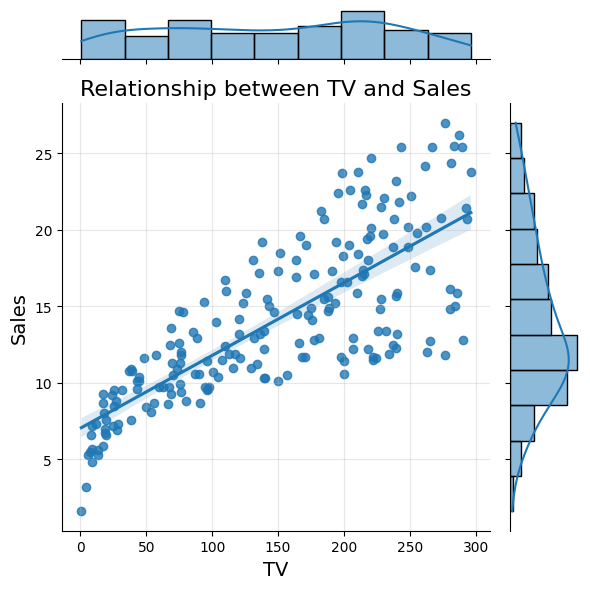

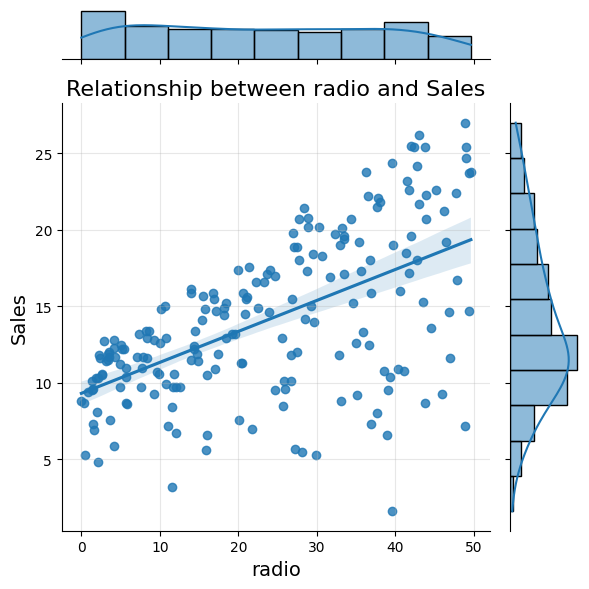

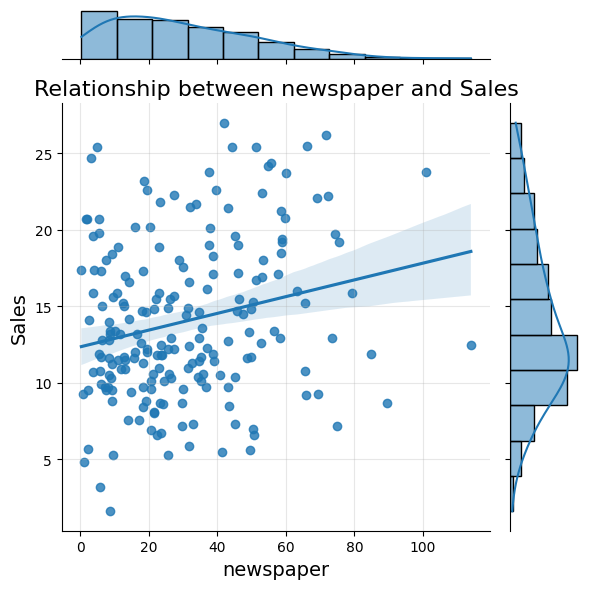

In [13]:
# Lets look at the relationship between the features (independent variables) and the target variable (dependent variable)

features = ['TV', 'radio', 'newspaper']

for feature in features:
    sns.jointplot(x=feature, y='sales', data=df, kind='reg')
    plt.title(f'Relationship between {feature} and Sales', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Sales', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [14]:
# Insights from the above plots:
# 1. There is a strong positive linear relationship between TV advertising budget and sales.
# 2. There is a moderate positive linear relationship between Radio advertising budget and sales.
# 3. There is a weak positive linear relationship between Newspaper advertising budget and sales.
# This indicates that TV advertising has the most significant impact on sales, followed by Radio and Newspaper.

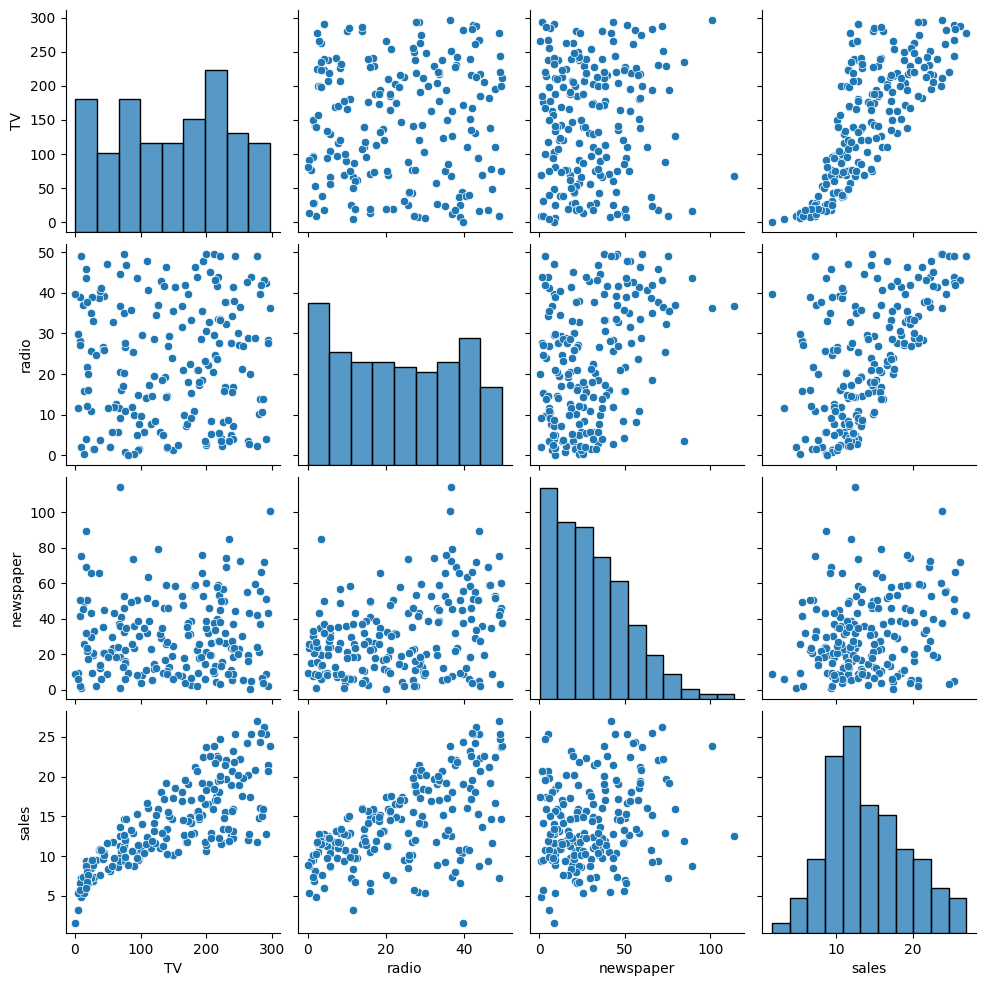

In [15]:
sns.pairplot(df)
plt.show()

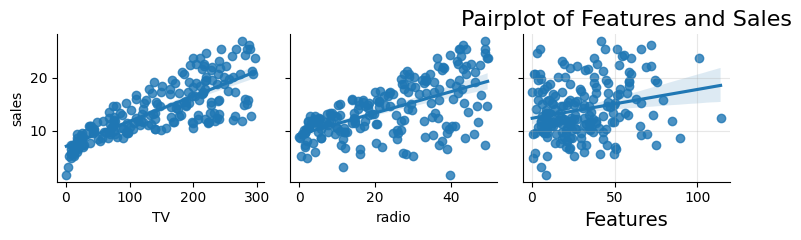

In [16]:
sns.pairplot(df, x_vars=features, y_vars='sales', kind='reg')
plt.title('Pairplot of Features and Sales', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [17]:
# Multicollinearity Check
# We can check for multicollinearity using the correlation matrix
correlation_matrix = df.corr(numeric_only=True)
print("Correlation matrix:")
correlation_matrix

# Simple Layman Example:
# I stay in Mumbai and I have some work in Pune and hence I will be travelling to Pune.
# For travel, I prefer to use my own car.
# BUT: I have 3 cars (My car, My Wife's car, My Dad's car)
# Decision: I will take all the cars for my work.
# My car: I will drive it myself.
# My Wife's car: I will hire a driver to drive it.
# My Dad's car: I will hire another driver to drive it.
# Question: Is my decision correct?
# Answer: No, it is not correct. I should have taken only one car because all the cars are similar and they will take me to the same place.
# Lets assume:
# y - My Mumbai to Pune travel
# X1 - My car
# X2 - My Wife's car
# X3 - My Dad's car
# The relationship between y and X1, X2, X3 is linear.
# But we realize that X1, X2, X3 are highly correlated with each other and this is called multicollinearity.
# Multicollinearity can lead to overfitting and instability in the model.
# In this case, we will consider any one of the cars (X1, X2, or X3) and drop the rest. Thats how we will handle multicollinearity.

# So when do we say that multicollinearity is present?
# If the correlation between two or more independent variables is greater than 0.7 or lesser than -0.7, then we can say that multicollinearity is present.
# Note: Multicollinearity is always between independent variables.

Correlation matrix:


,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


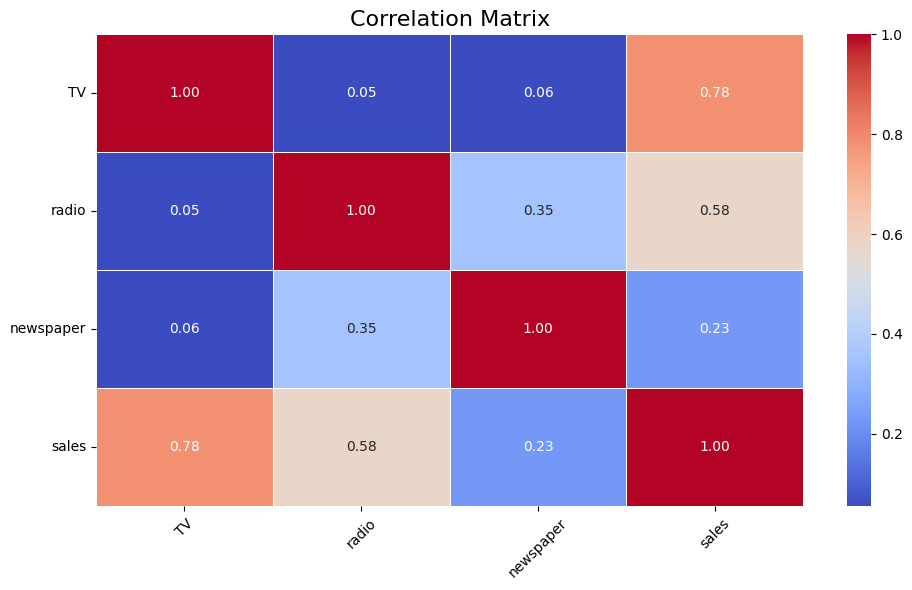

In [18]:
# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [19]:
# Insights from the correlation matrix:
# 1. There is a strong positive correlation between TV and Sales (0.78).
# 2. There is a moderate positive correlation between Radio and Sales (0.58).
# 3. There is a weak positive correlation between Newspaper and Sales (0.23).
# 4. There is no Multicollinearity between the independent variables (TV, Radio, Newspaper) as the correlation values are between -0.7 and 0.7.

### **Technical Explanation: What is Multicollinearity?**

**Multicollinearity** refers to a situation in multiple linear regression where **two or more independent variables (predictors) are highly correlated with each other**. This means that some predictors carry redundant information about the response variable. When multicollinearity is present, it becomes difficult for the regression model to accurately estimate the relationship between each predictor and the dependent variable.

---

### **Why is Multicollinearity a Problem?**

* It causes **instability in coefficient estimates**: small changes in data can lead to large changes in the estimated coefficients.
* It inflates the **standard errors of the coefficients**, making them statistically insignificant even if they are actually important.
* It reduces the **interpretability** of the model: you can’t tell which predictor is truly responsible for changes in the target.
* It may lead to **overfitting** in some cases.

---

### **How is Multicollinearity Detected?**

| Method                                | What to Look For                                                       | Acceptable Value Range                   |
| ------------------------------------- | ---------------------------------------------------------------------- | ---------------------------------------- |
| **Correlation Matrix**                | Correlation between predictors                                         | Preferably below ±0.7                    |
| **Variance Inflation Factor (VIF)**   | How much the variance of a coefficient is inflated due to collinearity | VIF < 5 acceptable; VIF > 10 problematic |
| **Condition Number**                  | Ratio of largest to smallest singular values                           | < 30 generally acceptable                |
| **Eigenvalues of correlation matrix** | Small eigenvalues indicate collinearity                                | No strict rule; interpret with caution   |

---

### **Acceptable Correlation Values in Business Context**

| Business Example                            | Independent Variables                       | Acceptable Correlation | Typical Decision                                         |
| ------------------------------------------- | ------------------------------------------- | ---------------------- | -------------------------------------------------------- |
| **Marketing: Sales Prediction**             | TV, Radio, Newspaper spend                  | < 0.7                  | Drop or combine highly correlated channels               |
| **Finance: Credit Scoring**                 | Income, Savings, Investment Amount          | < 0.7                  | Remove/reduce one of the correlated financial indicators |
| **Manufacturing: Production Rate Forecast** | Machine Hours, Labor Hours, Power Usage     | < 0.7                  | Keep most meaningful metric, remove redundant            |
| **Retail: Customer Spend Modeling**         | Loyalty points, Purchase frequency, Recency | < 0.7                  | Use PCA or remove less predictive features               |
| **Logistics: Delivery Time Prediction**     | Distance, Fuel Usage, Travel Time           | < 0.7                  | Remove one or use combined metric like Efficiency        |

---

### **How Decisions Are Taken in Practice**

| Scenario                                             | Technical Action                                             | Business Decision                                    |
| ---------------------------------------------------- | ------------------------------------------------------------ | ---------------------------------------------------- |
| Correlation between predictors is low (< 0.5)        | No action needed                                             | Keep all predictors                                  |
| Correlation is moderate (0.5 to 0.7)                 | Carefully examine; may keep if business logic differs        | Keep both if they capture different aspects          |
| Correlation is high (> 0.7)                          | Remove one, or apply dimensionality reduction (PCA)          | Keep only the feature with higher business relevance |
| VIF > 5 but < 10                                     | Investigate, may drop if redundancy confirmed                | Focus on simplifying the model                       |
| VIF > 10                                             | Strong evidence of multicollinearity; remove/reduce feature  | Remove to avoid misleading predictions               |
| Highly correlated but essential for interpretability | Keep both, accept some collinearity but caution on inference | For explanatory models, accept trade-off             |

---

### **Real-World Example**

#### Example 1: Marketing Campaign Spend

* TV spend and Radio spend are correlated at **0.82**.
* Decision: Drop Radio spend or build a combined 'Media Spend' variable.

#### Example 2: Manufacturing

* Machine A runtime and power consumption have a correlation of **0.91**.
* Decision: Keep machine runtime and drop power consumption from the model, as runtime drives production.

#### Example 3: Retail

* Customer visits and purchases are correlated at **0.65**.
* Decision: Keep both, as visits and purchases capture separate aspects of customer behavior.

---

### **Conclusion**

Multicollinearity does not affect **prediction accuracy** directly but it affects **model interpretability and stability**. If your goal is forecasting, you may tolerate some multicollinearity. But if your goal is to explain relationships, it must be addressed.

---



In [20]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [21]:
features = ['TV', 'radio', 'newspaper']
X = df[features]  # Independent variables
y = df['sales']  # Dependent variable

In [22]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [23]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [24]:
df.shape # Shape of the dataset is (200, 4)

(200, 4)

In [25]:
# Lets split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (160, 3)
Shape of X_test: (40, 3)
Shape of y_train: (160,)
Shape of y_test: (40,)


In [26]:
X_train.head()

,TV,radio,newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6


In [27]:
X_train.describe()

,TV,radio,newspaper
count,160.000000,160.000000,160.000000
mean,150.019375,22.875625,29.945625
std,84.418857,14.805216,20.336449
min,0.700000,0.000000,0.300000
25%,77.750000,9.825000,12.875000
50%,150.650000,21.200000,25.600000
75%,218.825000,36.425000,44.500000
max,296.400000,49.600000,100.900000


### **Feature Scaling in Industry: Which Scaler to Use, When, and Why?**

Feature scaling is a critical preprocessing step in many machine learning workflows. The choice of scaler directly affects model performance, training stability, and interpretability.

Below is a **logical, industry-aligned framework** to decide which scaling technique to apply in various situations.

---

## **1. Commonly Used Scalers and Their Industry Purpose**

| Scaler                                      | How It Works                                              | Typical Value Range | Affected Algorithms                                 | Industry Popularity |
| ------------------------------------------- | --------------------------------------------------------- | ------------------- | --------------------------------------------------- | ------------------- |
| **StandardScaler**                          | Subtracts mean, divides by standard deviation (Z-score)   | Mean = 0, Std = 1   | Linear regression, Logistic regression, SVM, PCA    | Very popular        |
| **MinMaxScaler**                            | Scales between a fixed range (usually 0 to 1)             | 0 to 1              | Neural networks, KNN, deep learning pipelines       | Popular             |
| **RobustScaler**                            | Removes median and scales using IQR (interquartile range) | Centered near 0     | Datasets with outliers (financial data, fraud)      | Used when needed    |
| **MaxAbsScaler**                            | Scales by maximum absolute value                          | -1 to 1             | Sparse data, text vectors, recommender systems      | Niche usage         |
| **Normalizer (L1/L2)**                      | Scales each sample vector to unit norm                    | Sum of squares = 1  | Text classification, cosine similarity-based models | Niche usage         |
| **QuantileTransformer**                     | Maps data to uniform or normal distribution               | Customizable        | Financial modeling, risk analysis                   | Less common         |
| **PowerTransformer (Yeo-Johnson, Box-Cox)** | Makes data more Gaussian-like                             | Gaussian-like       | Statistical modeling, predictive analytics          | Less common         |

---

## **2. Decision Framework: Which Scaler to Use?**

### **Step 1: Analyze the Algorithm Sensitivity**

| Algorithm Category                                     | Scaling Sensitivity   | Recommended Scalers                  |
| ------------------------------------------------------ | --------------------- | ------------------------------------ |
| **Distance-based (KNN, K-Means, PCA)**                 | Highly sensitive      | StandardScaler, MinMaxScaler         |
| **Gradient-based (Logistic Regression, SVM)**          | Moderately sensitive  | StandardScaler                       |
| **Tree-based (Decision Tree, Random Forest, XGBoost)** | Not sensitive         | No scaling or minimal scaling needed |
| **Neural Networks (MLP, CNN, RNN)**                    | Highly sensitive      | MinMaxScaler, StandardScaler         |
| **Sparse data (TF-IDF, CountVectors)**                 | Sensitive to sparsity | MaxAbsScaler                         |

---

### **Step 2: Look at Data Characteristics**

| Data Characteristic                    | Recommended Scaler                    | Example Industries                  |
| -------------------------------------- | ------------------------------------- | ----------------------------------- |
| Normal distribution, no outliers       | StandardScaler                        | Manufacturing KPIs, Marketing spend |
| Bounded, all positive values           | MinMaxScaler                          | Image pixels, sensor readings       |
| Data contains outliers                 | RobustScaler                          | Finance, Cybersecurity, Risk        |
| Sparse or already normalized           | MaxAbsScaler, Normalizer              | Text data, Recommendations          |
| Non-normal distribution, need Gaussian | PowerTransformer, QuantileTransformer | Insurance, Banking                  |

---

### **Step 3: Analyze Business Impact**

| Business Context                    | Common Scaler                     | Why                                   |
| ----------------------------------- | --------------------------------- | ------------------------------------- |
| Fraud detection (high outliers)     | RobustScaler                      | Protects against outlier distortion   |
| Customer segmentation (PCA/KMeans)  | StandardScaler                    | Ensures equal weight to all variables |
| Neural network image classification | MinMaxScaler                      | Ensures fast convergence              |
| Financial time series modeling      | StandardScaler / PowerTransformer | Makes input features normal           |
| IoT Sensor anomaly detection        | MinMaxScaler                      | All sensor signals scale uniformly    |

---

## **3. Which Scalers Are Most Popular in the Industry?**

| Industry Area                    | Most Popular Scaler            |
| -------------------------------- | ------------------------------ |
| Retail, Marketing Analytics      | StandardScaler, MinMaxScaler   |
| Manufacturing, IIoT              | MinMaxScaler                   |
| Banking & Finance                | RobustScaler, PowerTransformer |
| Cybersecurity                    | RobustScaler                   |
| Healthcare (predictive modeling) | StandardScaler                 |
| NLP/Text Analytics               | MaxAbsScaler, Normalizer       |

---

## **4. Final Recommendations: How to Choose in Real-Time**

### **If faced with a challenge:**

* **Step 1:** Check the model type → Is it distance-based? tree-based? gradient-based?
* **Step 2:** Assess data for outliers → If many outliers, avoid MinMaxScaler.
* **Step 3:** Check feature distribution → Is it close to Gaussian? Is it bounded between 0–100 or 0–255?
* **Step 4:** Run quick exploratory analysis (boxplots, histograms, skewness)
* **Step 5:** Start with StandardScaler as a default for non-sparse data unless there's a clear reason to change.

---

## **5. Summary of When to Use What**

| When to Use This                         | Scaler                                 |
| ---------------------------------------- | -------------------------------------- |
| Most general case                        | StandardScaler                         |
| Inputs are bounded like \[0, 255]        | MinMaxScaler                           |
| Data has extreme outliers                | RobustScaler                           |
| Sparse data (text, TF-IDF)               | MaxAbsScaler                           |
| Want Gaussian-shaped data                | PowerTransformer / QuantileTransformer |
| Vector normalization (cosine similarity) | Normalizer                             |

---



In [28]:
# Scaling the independent variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[features] = sc.fit_transform(X_train[features]) # fit - study, transform - apply the transformation
X_test[features] = sc.transform(X_test[features]) # transform - apply the same. Why not fit (i.e. study) on the test set? Because it already has studied the training set and we want to apply the same transformation on the test set. This will help us to see how the model performs on unseen data.

In [29]:
X_train.describe()

,TV,radio,newspaper
count,1.600000e+02,1.600000e+02,1.600000e+02
mean,-2.942091e-16,-2.081668e-16,1.665335e-17
std,1.003140e+00,1.003140e+00,1.003140e+00
min,-1.774345e+00,-1.549957e+00,-1.462335e+00
25%,-8.587688e-01,-8.842559e-01,-8.420458e-01
50%,7.493646e-03,-1.135334e-01,-2.143574e-01
75%,8.176095e-01,9.180491e-01,7.179263e-01
max,1.739424e+00,1.810732e+00,3.499979e+00


In [30]:
X_test.describe()

,TV,radio,newspaper
count,40.000000,40.000000,40.000000
mean,-0.176869,0.131573,0.150047
std,1.087436,1.023122,1.329547
min,-1.718496,-1.441548,-1.432739
25%,-1.157326,-0.753826,-0.901238
50%,-0.126189,0.303165,-0.150232
75%,0.803944,0.924825,0.844944
max,1.697834,1.797181,4.146165


In [31]:
# Modeling
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# Evaluate the model performance using appropriate metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Training set evaluation
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)
# Adjusted R-squared
# https://miro.medium.com/v2/resize:fit:1024/1*kW2xSxbIb7laGRoEcgx8vg.jpeg
n_train = X_train.shape[0]  # Number of observations in training set
p_train = X_train.shape[1]  # Number of features in training set
num_train = (1 - r2_train) * (n_train - 1)
denom_train = n_train - p_train - 1
adj_r2_train = 1 - (num_train / denom_train)

# Testing set evaluation
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)
# Adjusted R-squared
n_test = X_test.shape[0]  # Number of observations in testing set
p_test = X_test.shape[1]  # Number of features in testing set
num_test = (1 - r2_test) * (n_test - 1)
denom_test = n_test - p_test - 1
adj_r2_test = 1 - (num_test / denom_test)

# Print the evaluation metrics
print("Training and Testing Set Evaluation Metrics:")
print(f"Training Set - MAE: {mae_train}, Testing Set - MAE: {mae_test}")
print(f"Training Set - MSE: {mse_train}, Testing Set - MSE: {mse_test}")
print(f"Training Set - RMSE: {rmse_train}, Testing Set - RMSE: {rmse_test}")
print(f"Training Set - R-squared: {r2_train}, Testing Set - R-squared: {r2_test}")
print(f"Training Set - Adjusted R-squared: {adj_r2_train}, Testing Set - Adjusted R-squared: {adj_r2_test}")

# Printing the coefficients of the model
print("\nCoefficients of the model:")
for feature, coef in zip(features, lr.coef_):
    print(f"{feature}: {coef}")
# Printing the intercept of the model
print(f"Intercept: {lr.intercept_}")
# Printing the equation of the model
equation = "Sales = {} + {}*TV + {}*Radio + {}*Newspaper".format(
    lr.intercept_,
    lr.coef_[0],
    lr.coef_[1],
    lr.coef_[2]
)
print("\nEquation of the model:")
print(equation)
# Sales = 14.10 + 3.76*TV + 2.79*Radio + 0.06*Newspaper
# We understand that for every 1 unit increase in TV advertising budget, sales increases by 3.76 units, for every 1 unit increase in Radio advertising budget, sales increases by 2.79 units, and for every 1 unit increase in Newspaper advertising budget, sales increases by 0.06 units.

Training and Testing Set Evaluation Metrics:
Training Set - MAE: 1.1984678961500133, Testing Set - MAE: 1.4607567168117601
Training Set - MSE: 2.7051294230814142, Testing Set - MSE: 3.1740973539761073
Training Set - RMSE: 1.6447277656443373, Testing Set - RMSE: 1.781599661533451
Training Set - R-squared: 0.8957008271017817, Testing Set - R-squared: 0.8994380241009119
Training Set - Adjusted R-squared: 0.8936950737768159, Testing Set - Adjusted R-squared: 0.8910578594426546

Coefficients of the model:
TV: 3.7641961751469957
radio: 2.792306650198436
newspaper: 0.05597551446265259
Intercept: 14.100000000000001

Equation of the model:
Sales = 14.100000000000001 + 3.7641961751469957*TV + 2.792306650198436*Radio + 0.05597551446265259*Newspaper


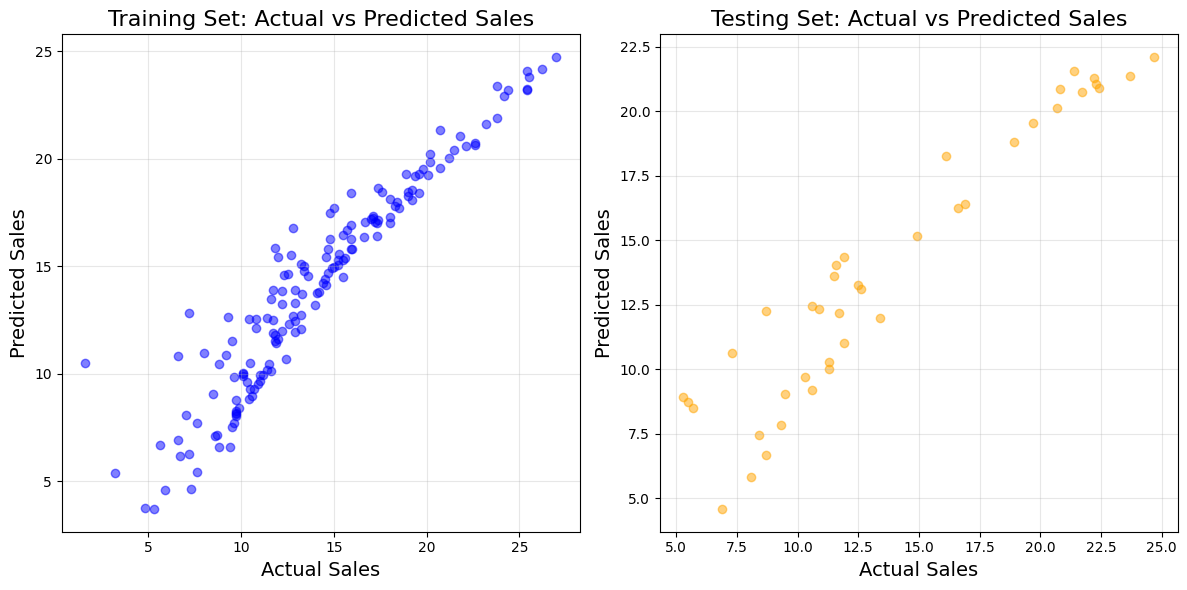

In [32]:
# Since the coefficients of TV and Radio are significantly higher than that of Newspaper, we can conclude that TV and Radio advertising have a much greater impact on sales compared to Newspaper advertising.
# Visualizing the predictions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.5)
plt.title('Training Set: Actual vs Predicted Sales', fontsize=16)
plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)
plt.grid(True, alpha=0.3)
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, color='orange', alpha=0.5)
plt.title('Testing Set: Actual vs Predicted Sales', fontsize=16)
plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### **Technical Interpretation of the Plots**

These two scatter plots show the **actual sales vs predicted sales** for a Multiple Linear Regression model applied to a sales prediction problem based on advertising channels (**TV, Radio, Newspaper**).

---

## **1. Left Plot: Training Set (Blue Dots)**

* **What you see:** Most points lie close to the diagonal line (imagined from bottom-left to top-right).
* **Interpretation:**

  * Your model fits the training data well.
  * Predicted sales closely match the actual sales for most records.
  * A few points deviate, showing minor prediction errors, but overall the fit is strong.
* **Technical Insight:**

  * High R² (coefficient of determination) is likely in the training data.
  * Low training error (low RMSE or MAE).

---

## **2. Right Plot: Testing Set (Orange Dots)**

* **What you see:** Points still follow the diagonal but with slightly more spread than the training set.
* **Interpretation:**

  * The model performs **reasonably well on unseen test data**, meaning it generalizes, but with a few cases where predictions are less accurate.
  * This spread is normal and expected, indicating a balance between **underfitting and overfitting.**
* **Technical Insight:**

  * Slightly lower R² and slightly higher error metrics on test data compared to training, which is a sign of a well-generalized model.
  * No evidence of severe overfitting, as the test data still follows the predicted trend.

---

## **3. Insights from the Code Comments: Feature Impact**

The additional comment in your code states:

> **"Since the coefficients of TV and Radio are significantly higher than that of Newspaper, we can conclude that TV and Radio advertising have a much greater impact on sales compared to Newspaper advertising."**

This is derived from the **regression coefficients**, meaning:

* TV and Radio spending have a strong **positive influence on sales**.
* Newspaper spending contributes **minimally or insignificantly**.

In business terms, marketing managers may want to **reallocate budget from Newspaper ads to TV and Radio for better ROI**.

---

## **4. Practical Business Interpretation**

| Finding                           | Business Action                                       |
| --------------------------------- | ----------------------------------------------------- |
| TV and Radio have higher impact   | Prioritize TV and Radio in marketing budget           |
| Model predicts training data well | Confirms historical relationship is well captured     |
| Testing data fits reasonably well | Model is reliable for forecasting future sales        |
| Some variance on test set         | Indicates need for further tuning or feature addition |

---

In [33]:
# Lets remove the newspaper column from the dataset and see how the model performs
features = ['TV', 'radio']
X = df[features]  # Independent variables
y = df['sales']  # Dependent variable
# Lets split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scaling the independent variables
sc = StandardScaler()
X_train[features] = sc.fit_transform(X_train[features])
X_test[features] = sc.transform(X_test[features])
# Modeling
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# Evaluate the model performance using appropriate metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Training set evaluation
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)
# Adjusted R-squared
# https://miro.medium.com/v2/resize:fit:1024/1*kW2xSxbIb7laGRoEcgx8vg.jpeg
n_train = X_train.shape[0]  # Number of observations in training set
p_train = X_train.shape[1]  # Number of features in training set
num_train = (1 - r2_train) * (n_train - 1)
denom_train = n_train - p_train - 1
adj_r2_train = 1 - (num_train / denom_train)

# Testing set evaluation
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)
# Adjusted R-squared
n_test = X_test.shape[0]  # Number of observations in testing set
p_test = X_test.shape[1]  # Number of features in testing set
num_test = (1 - r2_test) * (n_test - 1)
denom_test = n_test - p_test - 1
adj_r2_test = 1 - (num_test / denom_test)

# Print the evaluation metrics
print("Training and Testing Set Evaluation Metrics:")
print(f"Training Set - MAE: {mae_train}, Testing Set - MAE: {mae_test}")
print(f"Training Set - MSE: {mse_train}, Testing Set - MSE: {mse_test}")
print(f"Training Set - RMSE: {rmse_train}, Testing Set - RMSE: {rmse_test}")
print(f"Training Set - R-squared: {r2_train}, Testing Set - R-squared: {r2_test}")
print(f"Training Set - Adjusted R-squared: {adj_r2_train}, Testing Set - Adjusted R-squared: {adj_r2_test}")

# Printing the coefficients of the model
print("\nCoefficients of the model:")
for feature, coef in zip(features, lr.coef_):
    print(f"{feature}: {coef}")
# Printing the intercept of the model
print(f"Intercept: {lr.intercept_}")
# Printing the equation of the model
equation = "Sales = {} + {}*TV + {}*Radio".format(
    lr.intercept_,
    lr.coef_[0],
    lr.coef_[1]
)
print("\nEquation of the model:")
print(equation)

Training and Testing Set Evaluation Metrics:
Training Set - MAE: 1.1965003043815414, Testing Set - MAE: 1.444302313822757
Training Set - MSE: 2.7077907968620165, Testing Set - MSE: 3.1379480090683525
Training Set - RMSE: 1.6455366288424018, Testing Set - RMSE: 1.7714254173033515
Training Set - R-squared: 0.8955982149747163, Testing Set - R-squared: 0.9005833101920356
Training Set - Adjusted R-squared: 0.8942682559298082, Testing Set - Adjusted R-squared: 0.8952094350672808

Coefficients of the model:
TV: 3.7640938849924424
radio: 2.8140348219286717
Intercept: 14.100000000000001

Equation of the model:
Sales = 14.100000000000001 + 3.7640938849924424*TV + 2.8140348219286717*Radio


In [34]:
# Equation of the model for features ['TV', 'radio', 'newspaper'] was:
# Sales = 14.100000000000001 + 3.7641961751469952*TV + 2.792306650198438*Radio + 0.05597551446265332*Newspaper

# Equation of the model for features ['TV', 'radio'] is:
# Sales = 14.100000000000001 + 3.7640938849924415*TV + 2.8140348219286713*Radio

# We can see that the coefficients of TV and Radio have changed slightly, but the overall performance of the model is still good.

# Conclusion:
# 1. We can conclude that TV and Radio advertising have a significant impact on sales, while Newspaper advertising has a minimal impact.
# 2. Dropping the Newspaper column did not significantly affect the performance of the model. Doing better feature selection and engineering can further improve the model.
# 3. The model can be further improved by using more advanced techniques such as regularization, feature selection, and hyperparameter tuning.

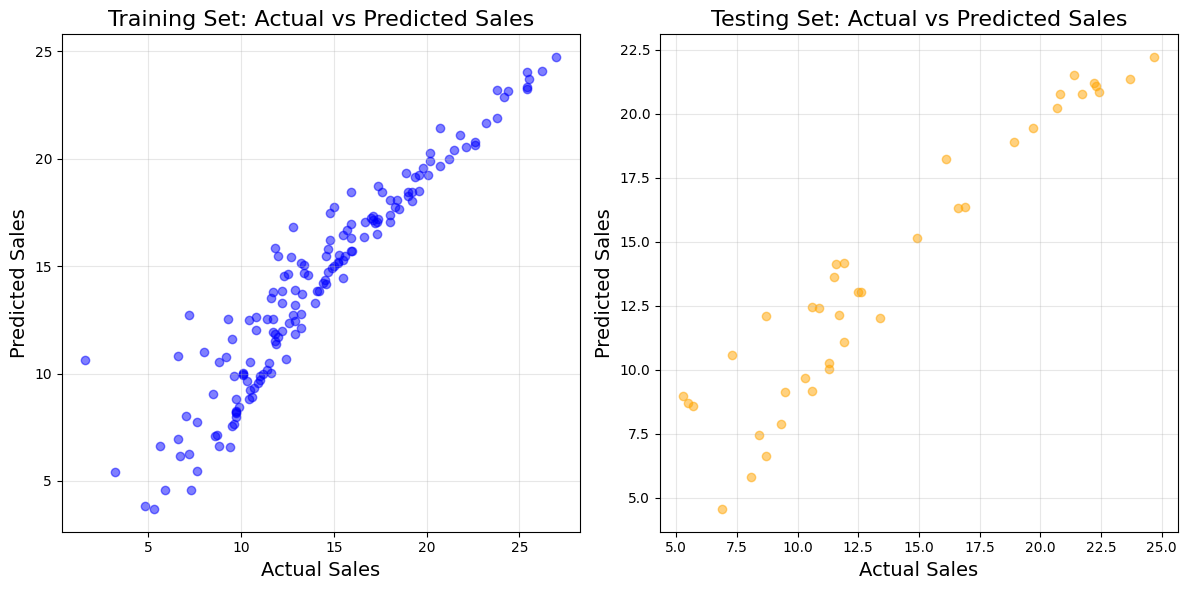

In [35]:
# Visualizing the predictions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.5)
plt.title('Training Set: Actual vs Predicted Sales', fontsize=16)
plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)
plt.grid(True, alpha=0.3)
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, color='orange', alpha=0.5)
plt.title('Testing Set: Actual vs Predicted Sales', fontsize=16)
plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

---

## ASSUMPTIONS OF LINEAR REGRESSION AND THEIR TESTING

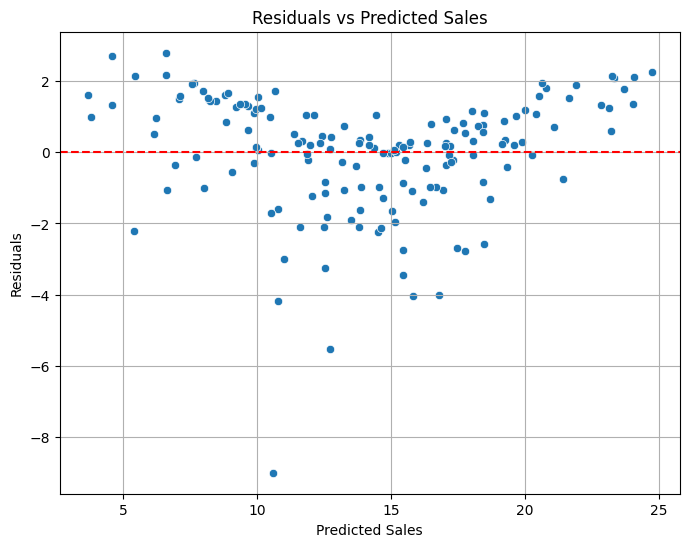

In [36]:
# ASSUMPTIONS OF LINEAR REGRESSION AND THEIR TESTING

# 1. Linearity
# There should be a linear relationship between the independent variables (TV, Radio) and the dependent variable (Sales).
# If this assumption is violated, linear regression is not the right choice.

# How to test:
# Visual test: Plot actual vs. predicted sales
# Residual Plot: Residuals (errors) should not show a pattern when plotted against predictions.

# Residuals vs Fitted Values
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_train - y_pred_train
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_train, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Sales')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# X-axis: Predicted Sales (Ŷ), i.e., model predictions
# Y-axis: Residuals = Actual Sales (Y) – Predicted Sales (Ŷ)
# Red dashed line: This is the zero residual line. 
# For a perfectly linear model, residuals would scatter randomly around this line.

# Ideal Plot Characteristics If Linearity Holds
# | Feature                       | Expected Observation                      |
# | ----------------------------- | ----------------------------------------- |
# | Residual spread               | Random scatter with no clear pattern      |
# | Centering                     | Residuals roughly centered around 0       |
# | No curvature or funnel shapes | No systematic increase/decrease in errors |
# | No clustering                 | Even spread across all predicted sales    |

# In our plot:
# | Finding                                                  | Interpretation                                                            |
# | -------------------------------------------------------- | ------------------------------------------------------------------------- |
# | Moderate clustering of residuals above 0 for lower sales | Possible slight **underprediction at lower sales**                        |
# | Slight spread funneling at higher predicted sales        | May indicate mild **heteroscedasticity**, but not severe                  |
# | No clear curve or systematic pattern                     | Indicates that the **linearity assumption holds reasonably well overall** |
# | Residuals roughly balanced around the red zero line      | Suggests no major model misspecification                                  |

# Your model captures the linear relationship between the predictors (TV, Radio) and the sales outcome quite well.
# The residual plot does not show a strong nonlinear pattern.
# Small deviations at extreme values (high or low sales) are normal in business problems, especially when few data points exist at the extremes.

In [37]:
# ASSUMPTIONS OF LINEAR REGRESSION AND THEIR TESTING

# 2. Independence of Errors
# Residuals should be independent.
# In time-series data, this is tested using Durbin-Watson test.
# For non-sequential data like this, independence is assumed if the data collection is independent.

from statsmodels.stats.stattools import durbin_watson

# Assuming y_train and y_pred_train are pandas Series
dw = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw}')
# A Durbin-Watson statistic close to 2.0 suggests no autocorrelation.
# < 1.5 or > 2.5 suggests problems.
# We are not using time series data, so we can assume independence of errors.

Durbin-Watson statistic: 2.161422092568393


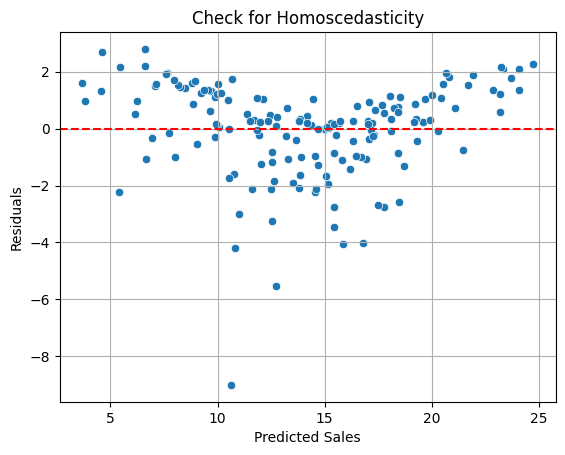

Breusch-Pagan p-value: 0.1435081644951662


In [38]:
# ASSUMPTIONS OF LINEAR REGRESSION AND THEIR TESTING

# 3. Homoscedasticity (Constant Variance of Errors)
# https://wallstreetmojo-files.s3.ap-south-1.amazonaws.com/2022/08/Picture16.png
# The spread of residuals should be constant across all levels of the predicted sales.
# If variance changes (fan shape or funnel shape), the assumption is violated (heteroscedasticity).

# Reuse residual plot to observe variance
sns.scatterplot(x=y_pred_train, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Check for Homoscedasticity')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Ideal Behavior in Homoscedasticity
# | If Homoscedasticity Holds                   | If Homoscedasticity is Violated                               |
# | ------------------------------------------- | ------------------------------------------------------------- |
# | Residuals have a **random, even spread**    | Residuals form a pattern (fan shape, cone shape)              |
# | No visible increase or decrease in variance | Variance of residuals increases or decreases with predictions |
# | No clustering                               | Residuals get wider or narrower at one end of predictions     |

# In out plot:
# | Finding                                                      | Interpretation                                                            |
# | ------------------------------------------------------------ | ------------------------------------------------------------------------- |
# | Fairly consistent spread of residuals across predicted sales | Homoscedasticity seems to hold reasonably well                            |
# | Slightly wider spread at the higher end of predicted sales   | Minor indication of **heteroscedasticity**, but within acceptable limits  |
# | No strong funnel shape or curvature                          | No serious heteroscedasticity problem                                     |
# | Residuals still balance around the zero line                 | Model predictions are not systematically biased at different sales levels |

# Should We Perform Formal Testing?
# You can optionally apply the Breusch-Pagan Test to quantify this:
# Null Hypothesis (H0): Residuals are homoscedastic.
# p-value > 0.05: Do not reject H0 → Homoscedasticity holds.

from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
bp_test = het_breuschpagan(residuals, X_train_const)
print(f'Breusch-Pagan p-value: {bp_test[1]}')
# Output:
# Breusch-Pagan p-value: 0.14350816449516365
# Interpretation:
# | If p-value     | Interpretation        | Conclusion                 |
# | -------------- | --------------------- | -------------------------- |
# | p-value > 0.05 | **Fail to reject H₀** | Homoscedasticity holds     |
# | p-value ≤ 0.05 | **Reject H₀**         | Heteroscedasticity present |

# Since your p-value is 0.1435 (> 0.05):
# You fail to reject the null hypothesis.
# There is no statistically significant evidence of heteroscedasticity in your regression model.

# Practical Meaning:
# | Finding                                               | Business Interpretation                            |
# | ----------------------------------------------------- | -------------------------------------------------- |
# | Variance of errors is constant across predicted sales | Model is statistically stable for all sales ranges |
# | No special action required                            | You can trust model predictions across the data    |


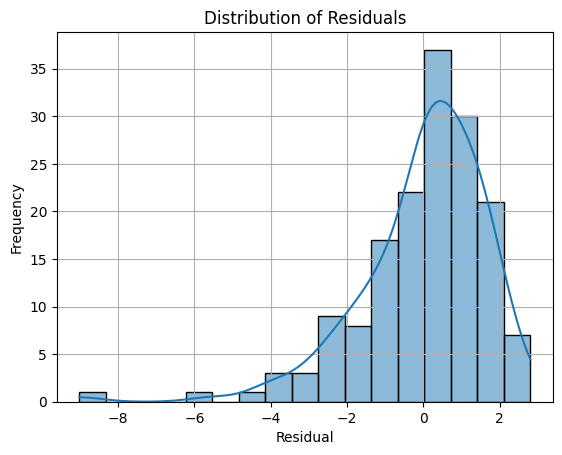

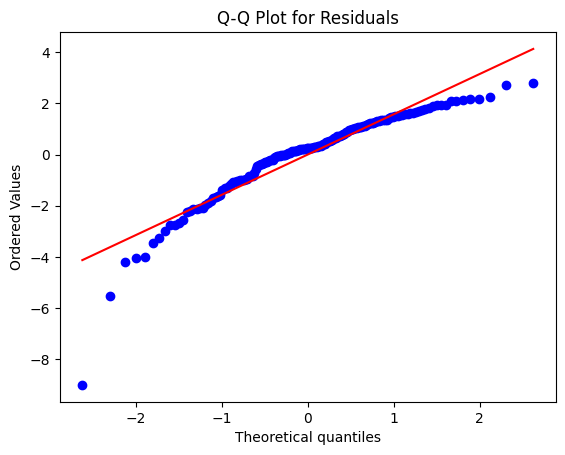

In [39]:
# ASSUMPTIONS OF LINEAR REGRESSION AND THEIR TESTING

# 4. Normality of Errors
# The residuals should be normally distributed.
# This is important for confidence intervals and hypothesis testing of coefficients.

# Histogram + KDE Plot
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Q-Q plot
import scipy.stats as stats
import matplotlib.pyplot as plt
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot for Residuals')
plt.show()

# The residuals are roughly centered around zero, as expected.
# The distribution is skewed left, meaning there are more negative residuals (underpredictions) than positive ones.
# The curve is not perfectly bell-shaped; there is a long left tail.

# | Observation            | Interpretation                                                                                  |
# | ---------------------- | ----------------------------------------------------------------------------------------------- |
# | Centered at zero       | The model's residuals are balanced on average.                                                  |
# | Skewed to the left     | Some underpredictions occur more often or with larger errors.                                   |
# | Not perfectly Gaussian | The residuals are **not perfectly normal**, but this is common in real-world business datasets. |

# Q-Q (Quantile-Quantile) Plot
# What is a Q-Q Plot?
# A Q-Q (Quantile-Quantile) Plot is a diagnostic tool used to compare the distribution of your data to a theoretical distribution, most commonly the normal distribution.
# It helps answer the question:
# “Does my data follow the expected distribution?”
# It plots the quantiles of your sample data against the quantiles of a theoretical distribution (usually normal).
# If your data perfectly matches the theoretical distribution, the points will lie on a straight 45-degree diagonal line.

# What Does It Show?
# | Feature                        | What It Means                                                |
# | ------------------------------ | ------------------------------------------------------------ |
# | Points fall on a straight line | Data matches the theoretical distribution                    |
# | Deviations from the line       | Data deviates from that distribution                         |
# | Curved line upwards            | Data is **right-skewed** (long tail on the right)            |
# | Curved line downwards          | Data is **left-skewed** (long tail on the left)              |
# | S-shaped curve                 | Data has heavier or lighter tails than a normal distribution |

# Why is the Q-Q Plot Used in Regression?
# In linear regression, we expect the residuals to be normally distributed.
# Q-Q plots help:
# Visually inspect whether this normality assumption holds.
# Detect skewness, kurtosis, and outliers.

# In our Q-Q plot, What We See:
# The points mostly follow the red diagonal line, especially in the middle range.
# At the extreme lower quantiles, points deviate below the line.
# This confirms the skewness seen in the histogram.

# | Section                           | Interpretation                                              |
# | --------------------------------- | ----------------------------------------------------------- |
# | Middle part follows the line      | Most residuals follow a normal distribution.                |
# | Left tail deviates below the line | Large negative residuals are **less normally distributed**. |
# | Right tail fairly aligned         | Positive residuals are closer to normal.                    |

# Final Conclusion on Normality Assumption
# | Aspect                          | Conclusion                                                  |
# | ------------------------------- | ----------------------------------------------------------- |
# | Normality in most of the data   | Yes, mostly normal                                          |
# | Deviations in extreme left tail | Slight issue, but not critical for prediction               |
# | Practical business impact       | Negligible unless you require precise statistical inference |
# If your goal is prediction, such as forecasting sales, this level of deviation is perfectly acceptable.
# If your goal was to generate precise p-values or confidence intervals, you might need to apply a transformation like log(Sales) to address the skewness.

# In our case:
# Normality of residuals is reasonably satisfied for predictive modeling.
# Slight left skewness is typical in sales data and does not invalidate the regression model.

In [40]:
# ASSUMPTIONS OF LINEAR REGRESSION AND THEIR TESTING

# 5. No Multicollinearity
# Predictors (TV, Radio) should not be strongly correlated with each other.

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif_data
# VIF < 5 is acceptable.
# VIF > 10 indicates strong multicollinearity.



,feature,VIF
0,TV,1.002911
1,radio,1.002911


In [41]:
# Business Meaning:
# For every additional unit spent on TV ads, sales increase by 3.76 units, assuming Radio spend stays constant.
# For every additional unit spent on Radio ads, sales increase by 2.81 units, assuming TV spend stays constant.
# If no ads are run, sales baseline at 14.10 units.

In [42]:
# Broad Steps to Solve the Problem:
# 1. Import necessary libraries
# 2. Load the dataset
# 3. Explore the dataset ( to see if there are any missing values, outliers, etc., and also to check if there is linear relationship between the features and the target variable)
# 4. Encoding categorical variables (if any)
# 5. Separate the independent variables (features) to X and dependent variable (target) to y
# 6. Split the dataset into training and testing sets
# 7. Scale the independent variables (if necessary). You will not scale the dependent variable.
# 8. Modeling - apply the Multiple Linear Regression algorithm or any other algorithm of your choice
# 9. Make predictions on the test set
# 10. Evaluate the model performance using appropriate metrics (e.g., R-squared, Mean Absolute Error, etc.)
# 11. Visualize the results (if necessary)
# 12. Save the model (if necessary)
# 13. Document the findings and conclusions
# 14. Share the results with stakeholders (if necessary)
# 15. Deploy the model (if necessary)

In [43]:
# 12. Save the model
import joblib # joblib is used to save the model

# Save the linear regression model
joblib.dump(lr, 'linear_regression_model.pkl')

# Save the StandardScaler
joblib.dump(sc, 'standard_scaler.pkl')

print("Model and scaler saved successfully.")

Model and scaler saved successfully.


In [44]:
# # Get the requirements.txt file for the app only
import pkg_resources
installed_packages = pkg_resources.working_set
with open('requirements.txt', 'w') as f:
    for package in installed_packages:
        f.write(f"{package.project_name}=={package.version}\n")

# Happy Learning